In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tabulate import tabulate
from tensorflow import keras


In [2]:
import sys
sys.path.insert(1, '../')

from preprocessing import Preprocessing
from model_adam import Model
from evaluation import Result
import os.path
print("import Preprocessing successfuly !")# -*- coding: utf-8 -*-


import Preprocessing successfuly !
Using TensorFlow backend.


# Load data to evaluations 

In [3]:
class Slider:
    def __init__(self, filename):
        self.data = {}
        self.slide = [7,8,9,10]
        self.filename = filename

    def dataGenerator(self, slide):
        dataset = '../datasets/'+self.filename
        prep = Preprocessing()
        prep.create_dataset(filename=dataset)
        prep.MinMaxNorm(prep.data)
        prep.SplitData()
        prep.RollingWindow(window=slide)

        return prep

    def getSlide(self):
        for i in self.slide:
            self.data['slide{}'.format(i)] = self.dataGenerator(i)

        return self.data

In [4]:
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

In [5]:
usd_slider = Slider(filename='USD_IDR.csv')
yjp_slider = Slider(filename='YJP_IDR.csv')

In [6]:
usd = usd_slider.getSlide()
yjp = yjp_slider.getSlide()

In [7]:
usd_obj = Struct(**usd)
yjp_obj = Struct(**yjp)

# Load File Model
## 1. Load models

In [8]:
# usd environment

slides  = [7,8,9,10]
neurons = [1,2,3,4]
modelpaths = './newmodels/yjp/'
models = {}

In [9]:
for i, slide in enumerate(slides):
    for j, neuron in enumerate(neurons):
        modelpath = modelpaths+'model{},{}.h5'.format(slide, neuron)
        if os.path.exists(modelpath):
            models['{},{}'.format(slide, neuron)] = keras.models.load_model(modelpath)
            print("load model {} successfully!".format(modelpath))
        else:
            print("file not found!")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
load model ./newmodels/yjp/model7,1.h5 successfully!
load model ./newmodels/yjp/model7,2.h5 successfully!
load model ./newmodels/yjp/model7,3.h5 successfully!
load model ./newmodels/yjp/model7,4.h5 successfully!
load model ./newmodels/yjp/model8,1.h5 successfully!
load model ./newmodels/yjp/model8,2.h5 successfully!
load model ./newmodels/yjp/model8,3.h5 successfully!
load model ./newmodels/yjp/model8,4.h5 successfully!
load model ./newmodels/yjp/model9,1.h5 successfully!
load model ./newmodels/yjp/model9,2.h5 successfully!
load model ./newmodels/yjp/model9,3.h5 successfully!
load model ./newmodels/yjp/model9,4.h5 successfully!
load model ./newmodels/yjp/model10,1.h5 successfully!
load model ./newmodels/yjp/model10,2.h5 successfully!
load model ./newmodels/yjp/model10,3.h5 successfully!
load model ./newmodels/yjp/model10,4.h5 successfully!


## 2. Evaluations

In [10]:
evals = {}
for key, value in models.items():
    evals[key] = value.predict(yjp['slide{}'.format(key.split(',')[0])].X_test)
    print("Process evals[{}] successfully!".format(key))

Process evals[7,1] successfully!
Process evals[7,2] successfully!
Process evals[7,3] successfully!
Process evals[7,4] successfully!
Process evals[8,1] successfully!
Process evals[8,2] successfully!
Process evals[8,3] successfully!
Process evals[8,4] successfully!
Process evals[9,1] successfully!
Process evals[9,2] successfully!
Process evals[9,3] successfully!
Process evals[9,4] successfully!
Process evals[10,1] successfully!
Process evals[10,2] successfully!
Process evals[10,3] successfully!
Process evals[10,4] successfully!


## 3. Analysis and Evaluation Results
### 3.1 Matrix approach eval

In [18]:
# Testing evaluations
sum_mae, sum_rmse, sum_da, sum_mape = 0,0,0,0
yjp_result = {}
for i, slide in enumerate(slides):
    for j, neuron in enumerate(neurons):
        actuals   = yjp['slide{}'.format(slide)].y_test
        predicted = evals['{},{}'.format(slide, neuron)]
        MAE, MAPE, RMSE, DA = Result.eval(
            actual=actuals[:-1], 
            predict=predicted[1:]
        )
        sum_mae += MAE
        sum_mape += MAPE
        sum_rmse += RMSE
        sum_da += DA

        yjp_result['{},{}'.format(slide, neuron)] = [MAE, MAPE, RMSE, DA]
        
    sum_mae, sum_mape, sum_rmse, sum_da = round(sum_mae/len(neurons), 3), round(sum_mape/len(neurons), 3), round(sum_rmse/len(neurons), 3), round(sum_da/len(neurons), 3)
    yjp_result['AVG_SLIDE{}'.format(slide)] = [sum_mae, sum_mape, sum_rmse, sum_da]
    sum_mae, sum_mape, sum_rmse, sum_da = 0,0,0,0

In [19]:
yjp_result = pd.DataFrame(yjp_result)
yjp_result = yjp_result.transpose()
yjp_result = yjp_result.rename(columns={
    0: 'MAE', 1: 'MAPE', 2: 'RMSE', 3: 'DA'
})


In [20]:
yjp_result

,MAE,MAPE,RMSE,DA
"7,1",0.036,3.866,0.936,0.725
"7,2",0.023,2.440,0.621,0.742
"7,3",0.018,1.949,0.458,0.772
"7,4",0.013,1.365,0.324,0.834
AVG_SLIDE7,0.022,2.405,0.585,0.768
"8,1",0.034,3.463,0.887,0.715
"8,2",0.020,2.033,0.538,0.789
"8,3",0.022,2.248,0.587,0.769
"8,4",0.016,1.590,0.434,0.873
AVG_SLIDE8,0.023,2.334,0.612,0.786


### Export result

In [21]:
yjp_result.to_csv(r'./results/yjp/singleLayer.csv')

In [22]:
def sortResult(data):
    bestAcc = data.sort_values('DA', ascending=False)
    bestErr = data.sort_values('MAE')

    return bestAcc, bestErr

In [23]:
bestAcc, bestErr = sortResult(yjp_result)

In [24]:
bestAcc[:1]

,MAE,MAPE,RMSE,DA
"8,4",0.016,1.59,0.434,0.873


In [25]:
bestErr[:1]

,MAE,MAPE,RMSE,DA
"7,4",0.013,1.365,0.324,0.834


## Plot Predictions
### Result plot of YJP-IDR

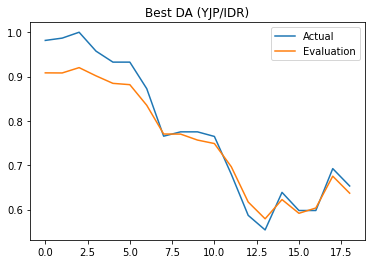

In [26]:
plt.plot(yjp['slide8'].y_test[:19])
plt.plot(evals['8,4'][1:20])
plt.title("Best DA (YJP/IDR)")
plt.legend(['Actual', 'Evaluation'])

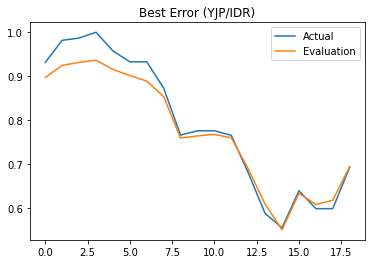

In [29]:
plt.plot(yjp['slide7'].y_test[:19])
plt.plot(evals['7,4'][1:20])
plt.title("Best Error (YJP/IDR)")
plt.legend(['Actual', 'Evaluation'])